In [29]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import random
import matplotlib.pyplot as plt

In [2]:
cd E:/Projects/Recommendation Systems/Datasets

E:\Projects\Recommendation Systems\Datasets


In [22]:
df = pd.read_csv('Hotels.txt',sep = ',')
df.head()

,name,address,desc
0,Hilton Garden Seattle Downtown,"1821 Boren Avenue, Seattle Washington 98101 USA","Located on the southern tip of Lake Union, the..."
1,Sheraton Grand Seattle,"1400 6th Avenue, Seattle, Washington 98101 USA","Located in the city's vibrant core, the Sherat..."
2,Crowne Plaza Seattle Downtown,"1113 6th Ave, Seattle, WA 98101","Located in the heart of downtown Seattle, the ..."
3,Kimpton Hotel Monaco Seattle,"1101 4th Ave, Seattle, WA98101",What?s near our hotel downtown Seattle locatio...
4,The Westin Seattle,"1900 5th Avenue,?Seattle,?Washington?98101?USA",Situated amid incredible shopping and iconic a...


In [25]:
def print_description(index):
    example = df[df.index == index][['desc', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print()
        print('Name:', example[1])

In [26]:
print_description(5)

More than just a hotel, The Paramount Hotel Seattle summons the feel of cozy, elegant and luxurious private residence with friendly hosts, the most comfortable beds in Seattle and an award-winning?Asian restaurant?right downstairs. You?ll fall in love with the simple luxury and charm of our boutique hotel, from the warm, inviting wood finishes, comfy seating areas and fireplace in the lobby to the classically decorated rooms and suites appointed with a dash of urban flair. Our central downtown location puts you in good company: one block from the Washington State Convention Center and walking distance to Pike Place Market, the Seattle Art Museum and diverse shopping, cafes and restaurants. There are many reasons The Paramount Hotel is annually ranked among the top five hotels in downtown Seattle, Washington. Why not come find out yours? 

Name: The Paramount Hotel Seattle


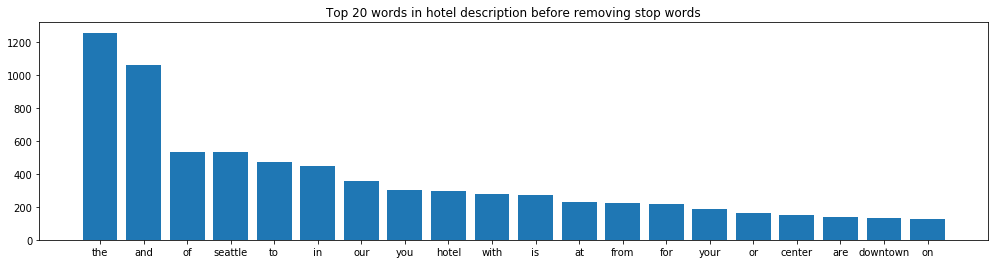

In [49]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['desc'], 20)
df1 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
x = np.arange(20)
plt.figure(figsize = (17,4))
plt.bar(x, df1['count'])
plt.xticks(x,df1.desc)
plt.title('Top 20 words in hotel description before removing stop words')
plt.show()

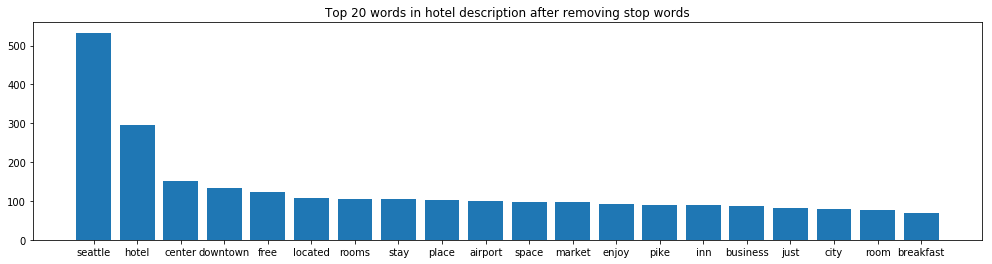

In [48]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['desc'], 20)
df2 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
x = np.arange(20)
plt.figure(figsize = (17,4))
plt.bar(x, df2['count'])
plt.xticks(x,df2.desc)
plt.title('Top 20 words in hotel description after removing stop words')
plt.show()

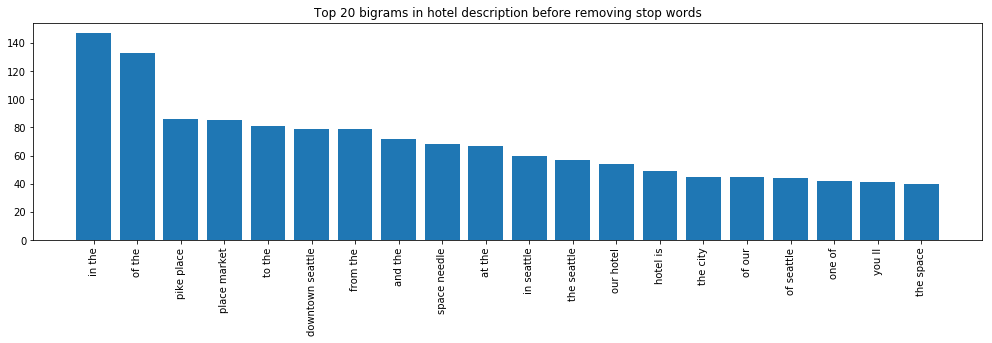

In [51]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['desc'], 20)
df3 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
x = np.arange(20)
plt.figure(figsize = (17,4))
plt.bar(x, df3['count'])
plt.xticks(x,df3.desc,rotation=90)
plt.title('Top 20 bigrams in hotel description before removing stop words')
plt.show()

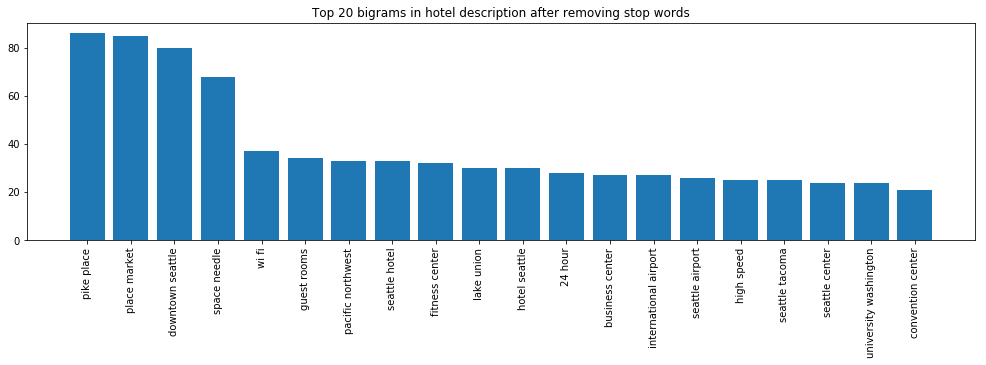

In [52]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['desc'], 20)
df4 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
x = np.arange(20)
plt.figure(figsize = (17,4))
plt.bar(x, df4['count'])
plt.xticks(x,df4.desc,rotation=90)
plt.title('Top 20 bigrams in hotel description after removing stop words')
plt.show()

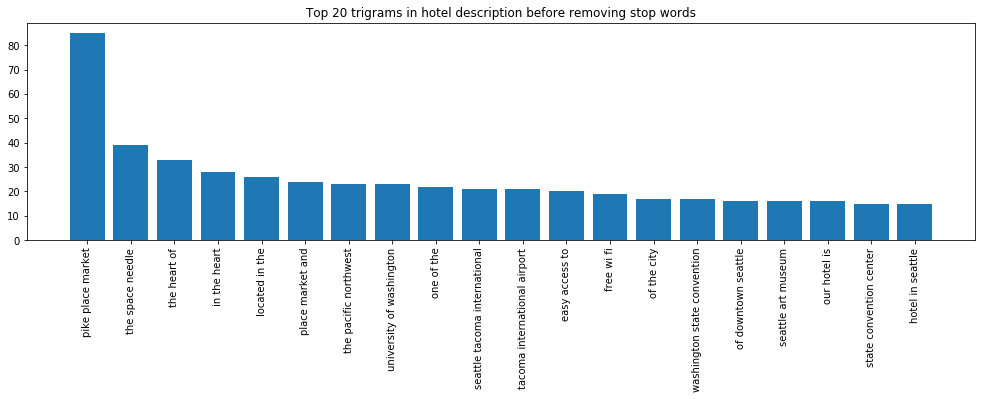

In [53]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['desc'], 20)
df5 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
x = np.arange(20)
plt.figure(figsize = (17,4))
plt.bar(x, df5['count'])
plt.xticks(x,df5.desc,rotation=90)
plt.title('Top 20 trigrams in hotel description before removing stop words')
plt.show()

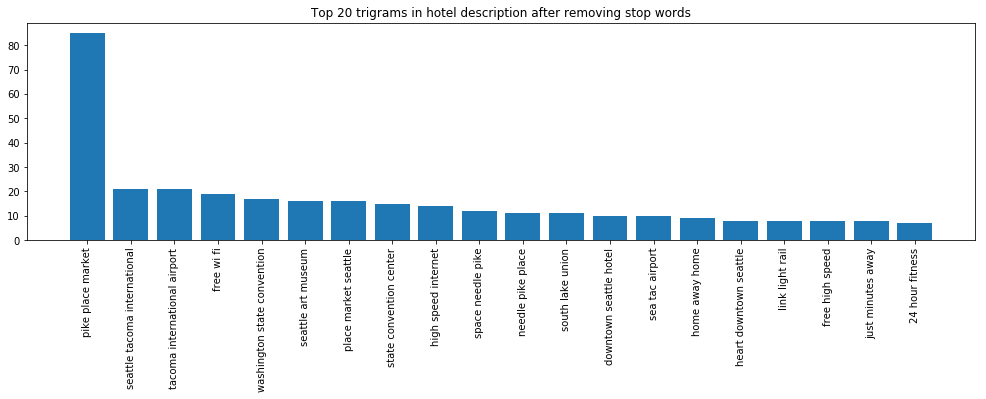

In [54]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['desc'], 20)
df6 = pd.DataFrame(common_words, columns = ['desc' , 'count'])
x = np.arange(20)
plt.figure(figsize = (17,4))
plt.bar(x, df6['count'])
plt.xticks(x,df6.desc,rotation=90)
plt.title('Top 20 trigrams in hotel description after removing stop words')
plt.show()

In [55]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df['desc_clean'] = df['desc'].apply(clean_text)

In [56]:
def print_description(index):
    example = df[df.index == index][['desc_clean', 'name']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Name:', example[1])
print_description(5)

hotel paramount hotel seattle summons feel cozy elegant luxurious private residence friendly hosts comfortable beds seattle awardwinningasian restaurantright downstairs youll fall love simple luxury charm boutique hotel warm inviting wood finishes comfy seating areas fireplace lobby classically decorated rooms suites appointed dash urban flair central downtown location puts good company one block washington state convention center walking distance pike place market seattle art museum diverse shopping cafes restaurants many reasons paramount hotel annually ranked among top five hotels downtown seattle washington come find
Name: The Paramount Hotel Seattle


In [57]:
df.set_index('name', inplace = True)
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['desc_clean'])
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

indices = pd.Series(df.index)
indices[:50]

0                        Hilton Garden Seattle Downtown
1                                Sheraton Grand Seattle
2                         Crowne Plaza Seattle Downtown
3                         Kimpton Hotel Monaco Seattle 
4                                    The Westin Seattle
5                           The Paramount Hotel Seattle
6                                        Hilton Seattle
7                                         Motif Seattle
8                                       Warwick Seattle
9                            Four Seasons Hotel Seattle
10                                            W Seattle
11                                   Gand Hyatt Seattle
12                                 Kimpton Alexis Hotel
13                                            Hotel Max
14                                    Ace Hotel Seattle
15                          Seattle Marriott Waterfront
16                          The Edgewater Hotel Seattle
17                   SpringHill Suites Seattle?D

In [58]:
def recommendations(name, cosine_similarities = cosine_similarities):
    
    recommended_hotels = []
    
    # gettin the index of the hotel that matches the name
    idx = indices[indices == name].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending = False)

    # getting the indexes of the 10 most similar hotels except itself
    top_10_indexes = list(score_series.iloc[1:11].index)
    
    # populating the list with the names of the top 10 matching hotels
    for i in top_10_indexes:
        recommended_hotels.append(list(df.index)[i])
        
    return recommended_hotels

In [59]:
recommendations('Hilton Seattle Airport & Conference Center')

['Embassy Suites by Hilton Seattle Tacoma International Airport',
 'DoubleTree by Hilton Hotel Seattle Airport',
 'Seattle Airport Marriott',
 'Motel 6 Seattle Sea-Tac Airport South',
 'Econo Lodge SeaTac Airport North',
 'Four Points by Sheraton Downtown Seattle Center',
 'Knights Inn Tukwila',
 'Econo Lodge Renton-Bellevue',
 'Hampton Inn Seattle/Southcenter',
 'Radisson Hotel Seattle Airport']